In [2]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

character(0)

In [7]:
# Load data from CSV file
data <- read.csv("/kaggle/input/e-commerce-churn-dataset/churn_data.csv")

# Print the first few rows of the data frame
head(data)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
,<int>,<int>,<int>,<chr>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,50001,1,4,Mobile Phone,3,6,Debit Card,Female,3,3,Laptop & Accessory,2,Single,9,1,11,1,1,5,160
2,50002,1,NA,Phone,1,8,UPI,Male,3,4,Mobile,3,Single,7,1,15,0,1,0,121
3,50003,1,NA,Phone,1,30,Debit Card,Male,2,4,Mobile,3,Single,6,1,14,0,1,3,120
4,50004,1,0,Phone,3,15,Debit Card,Male,2,4,Laptop & Accessory,5,Single,8,0,23,0,1,3,134
5,50005,1,0,Phone,1,12,CC,Male,NA,3,Mobile,5,Single,3,0,11,1,1,3,130
6,50006,1,0,Computer,1,22,Debit Card,Female,3,5,Mobile Phone,5,Single,2,1,22,4,6,7,139


In [10]:
str(data)


'data.frame':	5630 obs. of  20 variables:
 $ CustomerID                 : int  50001 50002 50003 50004 50005 50006 50007 50008 50009 50010 ...
 $ Churn                      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Tenure                     : int  4 NA NA 0 0 0 NA NA 13 NA ...
 $ PreferredLoginDevice       : chr  "Mobile Phone" "Phone" "Phone" "Phone" ...
 $ CityTier                   : int  3 1 1 3 1 1 3 1 3 1 ...
 $ WarehouseToHome            : int  6 8 30 15 12 22 11 6 9 31 ...
 $ PreferredPaymentMode       : chr  "Debit Card" "UPI" "Debit Card" "Debit Card" ...
 $ Gender                     : chr  "Female" "Male" "Male" "Male" ...
 $ HourSpendOnApp             : int  3 3 2 2 NA 3 2 3 NA 2 ...
 $ NumberOfDeviceRegistered   : int  3 4 4 4 3 5 3 3 4 5 ...
 $ PreferedOrderCat           : chr  "Laptop & Accessory" "Mobile" "Mobile" "Laptop & Accessory" ...
 $ SatisfactionScore          : int  2 3 3 5 5 5 2 2 3 3 ...
 $ MaritalStatus              : chr  "Single" "Single" "Single" "Single" ...
 

In [11]:
colnames(data)

[1] "CustomerID"                  "Churn"                      
 [3] "Tenure"                      "PreferredLoginDevice"       
 [5] "CityTier"                    "WarehouseToHome"            
 [7] "PreferredPaymentMode"        "Gender"                     
 [9] "HourSpendOnApp"              "NumberOfDeviceRegistered"   
[11] "PreferedOrderCat"            "SatisfactionScore"          
[13] "MaritalStatus"               "NumberOfAddress"            
[15] "Complain"                    "OrderAmountHikeFromlastYear"
[17] "CouponUsed"                  "OrderCount"                 
[19] "DaySinceLastOrder"           "CashbackAmount"

In [12]:
data <- data[, !names(data) %in% 'CustomerID', drop = FALSE]

In [13]:
colnames(data)

[1] "Churn"                       "Tenure"                     
 [3] "PreferredLoginDevice"        "CityTier"                   
 [5] "WarehouseToHome"             "PreferredPaymentMode"       
 [7] "Gender"                      "HourSpendOnApp"             
 [9] "NumberOfDeviceRegistered"    "PreferedOrderCat"           
[11] "SatisfactionScore"           "MaritalStatus"              
[13] "NumberOfAddress"             "Complain"                   
[15] "OrderAmountHikeFromlastYear" "CouponUsed"                 
[17] "OrderCount"                  "DaySinceLastOrder"          
[19] "CashbackAmount"

In [14]:
#missing values
missing_values <- colSums(is.na(data))

# Display the result
print(missing_values)

                      Churn                      Tenure 
                          0                         264 
       PreferredLoginDevice                    CityTier 
                          0                           0 
            WarehouseToHome        PreferredPaymentMode 
                        251                           0 
                     Gender              HourSpendOnApp 
                          0                         255 
   NumberOfDeviceRegistered            PreferedOrderCat 
                          0                           0 
          SatisfactionScore               MaritalStatus 
                          0                           0 
            NumberOfAddress                    Complain 
                          0                           0 
OrderAmountHikeFromlastYear                  CouponUsed 
                        265                         256 
                 OrderCount           DaySinceLastOrder 
                        258    

In [15]:
#fill those missing values

# Loop through columns
for (col in names(data)) {
  # Check if there are missing values in the column
  if (sum(is.na(data[[col]])) > 0) {
    # Fill missing values with the median of the column
    data[[col]][is.na(data[[col]])] <- median(data[[col]], na.rm = TRUE)
  }
}

# Checking missing values for the last time
print(colSums(is.na(data)))

                      Churn                      Tenure 
                          0                           0 
       PreferredLoginDevice                    CityTier 
                          0                           0 
            WarehouseToHome        PreferredPaymentMode 
                          0                           0 
                     Gender              HourSpendOnApp 
                          0                           0 
   NumberOfDeviceRegistered            PreferedOrderCat 
                          0                           0 
          SatisfactionScore               MaritalStatus 
                          0                           0 
            NumberOfAddress                    Complain 
                          0                           0 
OrderAmountHikeFromlastYear                  CouponUsed 
                          0                           0 
                 OrderCount           DaySinceLastOrder 
                          0    

In [16]:
print('dimensions:')
dim(data)

summary(data)

[1] "dimensions:"


[1] 5630   19

     Churn            Tenure      PreferredLoginDevice    CityTier    
 Min.   :0.0000   Min.   : 0.00   Length:5630          Min.   :1.000  
 1st Qu.:0.0000   1st Qu.: 3.00   Class :character     1st Qu.:1.000  
 Median :0.0000   Median : 9.00   Mode  :character     Median :1.000  
 Mean   :0.1684   Mean   :10.13                        Mean   :1.655  
 3rd Qu.:0.0000   3rd Qu.:15.00                        3rd Qu.:3.000  
 Max.   :1.0000   Max.   :61.00                        Max.   :3.000  
 WarehouseToHome  PreferredPaymentMode    Gender          HourSpendOnApp 
 Min.   :  5.00   Length:5630          Length:5630        Min.   :0.000  
 1st Qu.:  9.00   Class :character     Class :character   1st Qu.:2.000  
 Median : 14.00   Mode  :character     Mode  :character   Median :3.000  
 Mean   : 15.57                                           Mean   :2.935  
 3rd Qu.: 20.00                                           3rd Qu.:3.000  
 Max.   :127.00                                           M

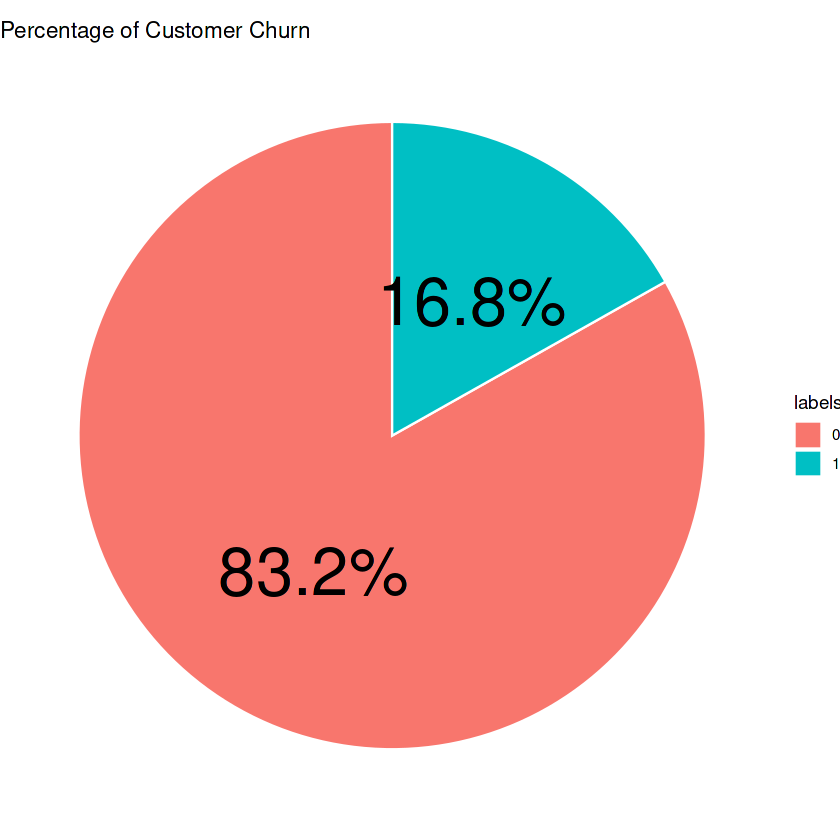

In [17]:
#The Percentage of Customer Churn

library(ggplot2)

# Calculate the counts of 'Retained' and 'Churn'
counts <- table(data$Churn)

# Create a data frame for plotting
churn_data <- data.frame(labels = names(counts), counts = as.numeric(counts))

# Plotting the pie chart
pie_plot <- ggplot(churn_data, aes(x = "", y = counts, fill = labels)) +
  geom_bar(stat = "identity", width = 1, color = "white") +
  coord_polar("y") +
  theme_void() +
  ggtitle("Percentage of Customer Churn") +
  geom_text(aes(label = sprintf("%1.1f%%", (counts / sum(counts)) * 100)), position = position_stack(vjust = 0.5), size = 14)

# Display the pie chart
print(pie_plot)

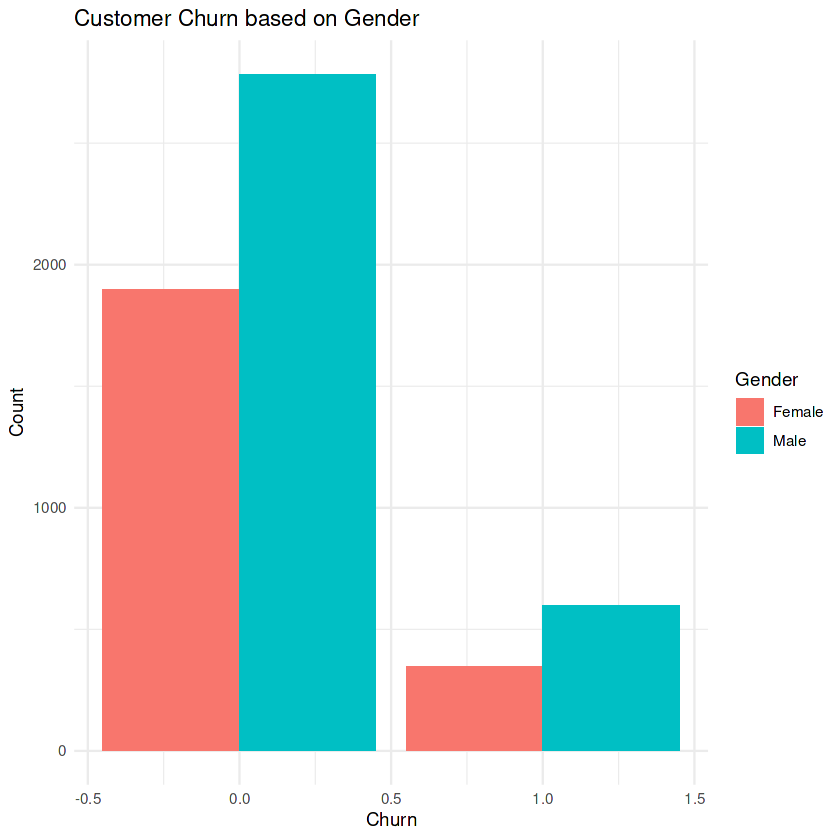

In [18]:
#Customer Churn based on Gender

library(ggplot2)

# Plotting the count plot
count_plot <- ggplot(data, aes(x = Churn, fill = Gender)) +
  geom_bar(position = "dodge", stat = "count") +
  labs(title = "Customer Churn based on Gender") +
  xlab("Churn") +
  ylab("Count") +
  theme_minimal()

# Display the count plot
print(count_plot)

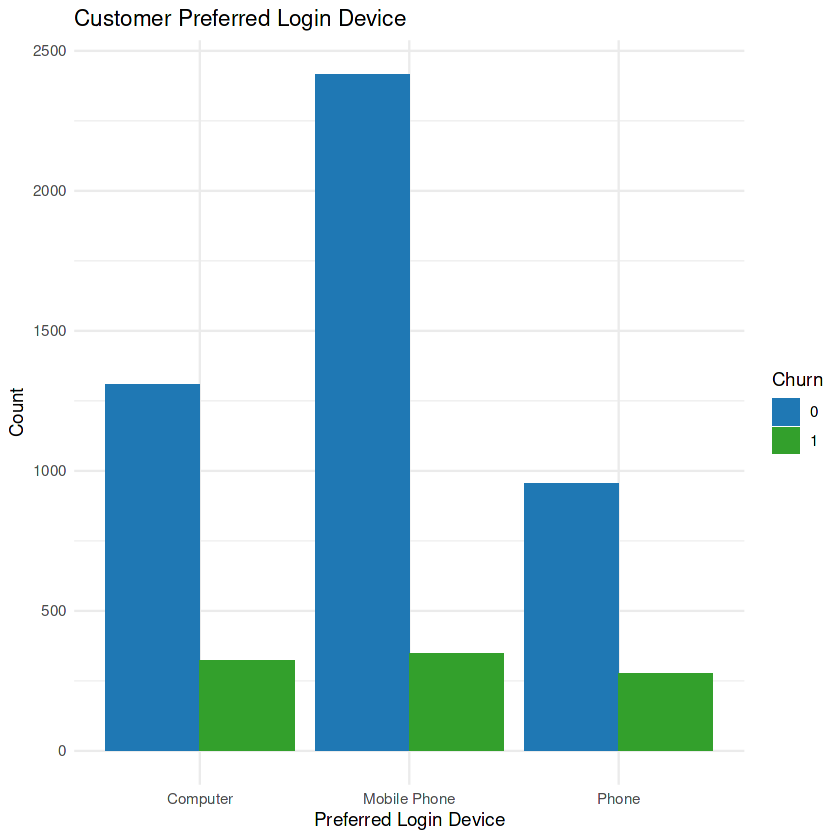

In [22]:
#Customer Preferred Login Device

library(ggplot2)

# Convert 'Churn' and 'PreferredLoginDevice' to factors
data$Churn <- as.factor(data$Churn)
data$PreferredLoginDevice <- as.factor(data$PreferredLoginDevice)

# Plotting the count plot with different colors for each level of 'Churn'
count_plot <- ggplot(data, aes(x = PreferredLoginDevice, fill = Churn)) +
  geom_bar(position = "dodge", stat = "count") +
  labs(title = 'Customer Preferred Login Device') +
  xlab('Preferred Login Device') +
  ylab('Count') +
  scale_fill_manual(values = c("#1f78b4", "#33a02c"), name = "Churn") +  # Specify colors for Churn 0 and 1
  theme_minimal()

# Display the count plot
print(count_plot)

Average Satisfaction Score: 3.066785 


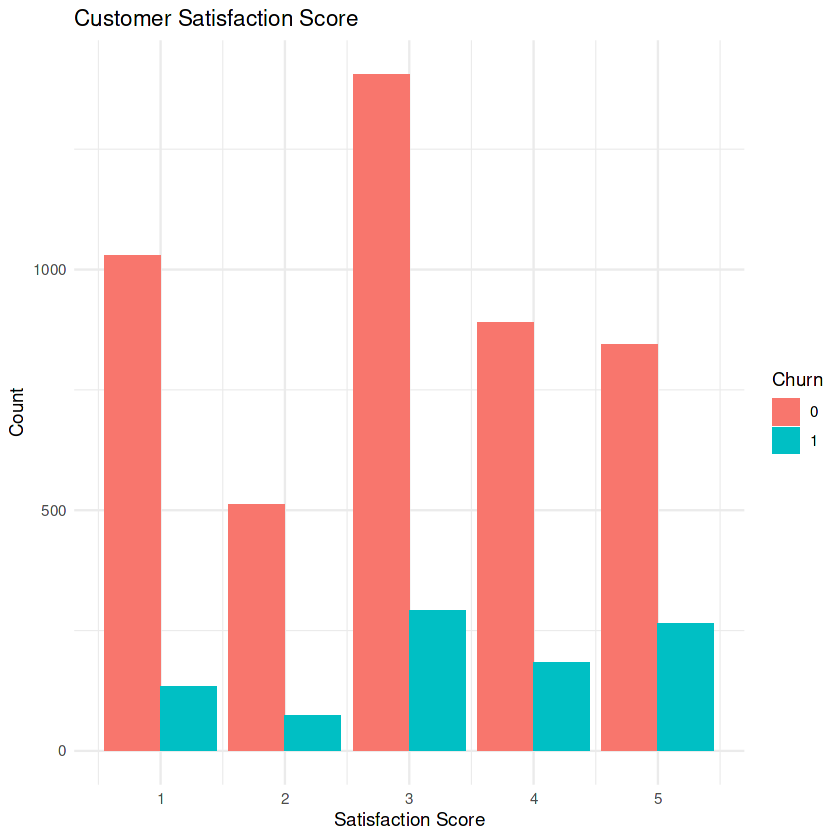

In [23]:

#Customers Satisfaction Score

# Calculate the average satisfaction score
average_score <- mean(data$SatisfactionScore, na.rm = TRUE)
cat("Average Satisfaction Score:", average_score, "\n")

# Plotting the count plot
count_plot <- ggplot(data, aes(x = SatisfactionScore, fill = Churn)) +
  geom_bar(position = "dodge", stat = "count") +
  labs(title = 'Customer Satisfaction Score') +
  xlab('Satisfaction Score') +
  ylab('Count') +
  theme_minimal()

# Display the count plot
print(count_plot)

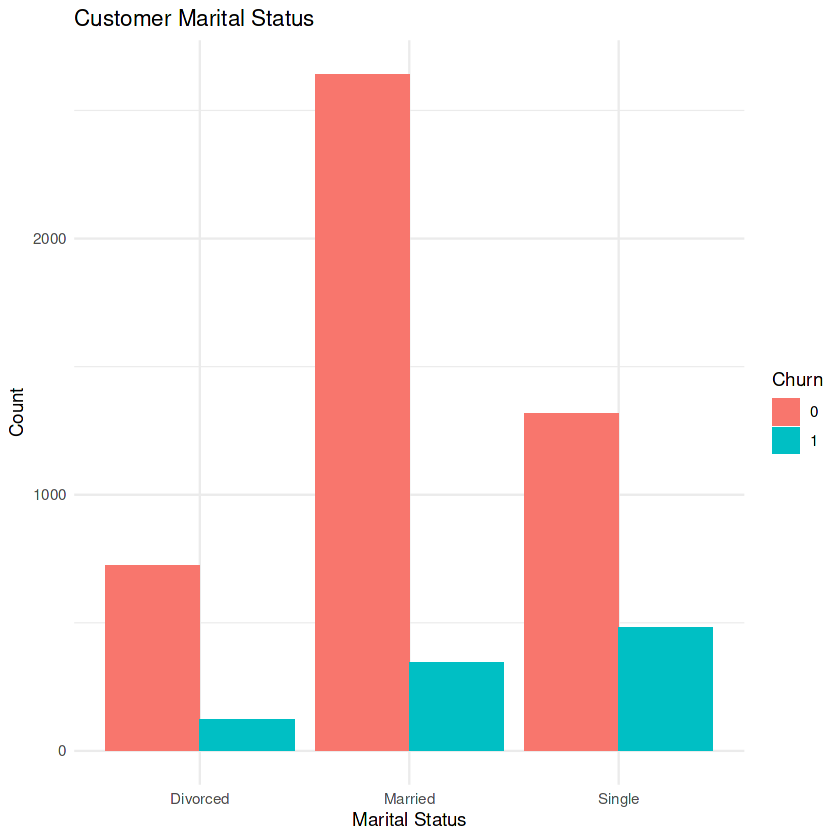

In [24]:

#Customer Marital Status

# Plotting the count plot
count_plot <- ggplot(data, aes(x = MaritalStatus, fill = Churn)) +
  geom_bar(position = "dodge", stat = "count") +
  labs(title = 'Customer Marital Status') +
  xlab('Marital Status') +
  ylab('Count') +
  theme_minimal()

# Display the count plot
print(count_plot)

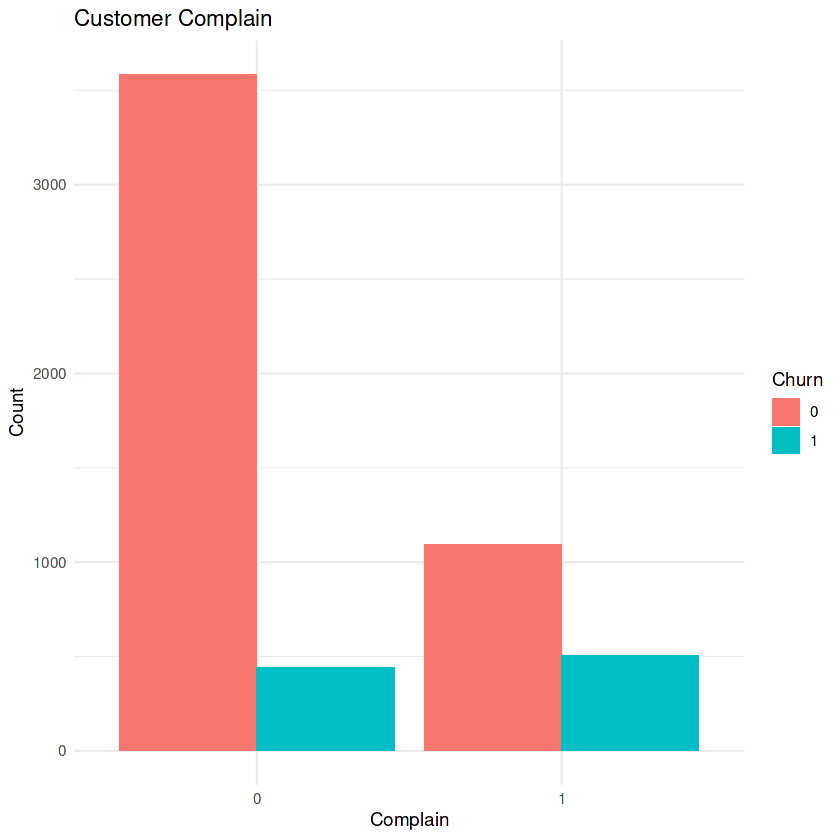

In [25]:
# Customer Complains

# Convert 'Complain' to a factor if it's not already
data$Complain <- as.factor(data$Complain)

# Plotting the count plot
count_plot <- ggplot(data, aes(x = Complain, fill = Churn)) +
  geom_bar(position = "dodge", stat = "count") +
  labs(title = 'Customer Complain') +
  xlab('Complain') +
  ylab('Count') +
  theme_minimal()

# Display the count plot
print(count_plot)

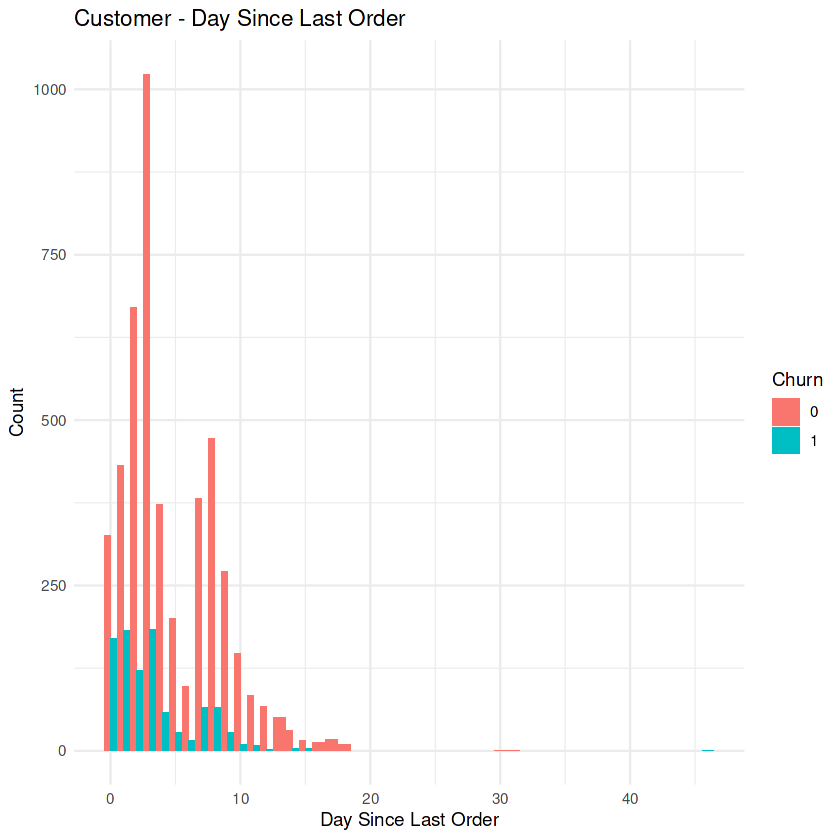

In [26]:
#Customer Day Since Last Order

# Plotting the count plot
count_plot <- ggplot(data, aes(x = DaySinceLastOrder, fill = Churn)) +
  geom_bar(position = "dodge", stat = "count") +
  labs(title = 'Customer - Day Since Last Order') +
  xlab('Day Since Last Order') +
  ylab('Count') +
  theme_minimal()

# Display the count plot
print(count_plot)

$corr
                                  Tenure     CityTier WarehouseToHome
Tenure                       1.000000000 -0.057894631   -1.219127e-02
CityTier                    -0.057894631  1.000000000    1.357604e-02
WarehouseToHome             -0.012191271  0.013576040    1.000000e+00
HourSpendOnApp              -0.017282308 -0.009921308    6.406873e-02
NumberOfDeviceRegistered    -0.020657306  0.027934250    2.302044e-02
SatisfactionScore           -0.014451974 -0.011554068    7.524419e-03
NumberOfAddress              0.235075891 -0.029440119   -8.304620e-03
OrderAmountHikeFromlastYear -0.005542074 -0.028890214    3.831137e-02
CouponUsed                   0.101534845  0.022629011    2.675068e-03
OrderCount                   0.165339449  0.033551013    3.538141e-04
DaySinceLastOrder            0.174377952  0.010214329    2.025262e-02
CashbackAmount               0.468178232  0.055698434    9.009522e-05
                            HourSpendOnApp NumberOfDeviceRegistered
Tenure          

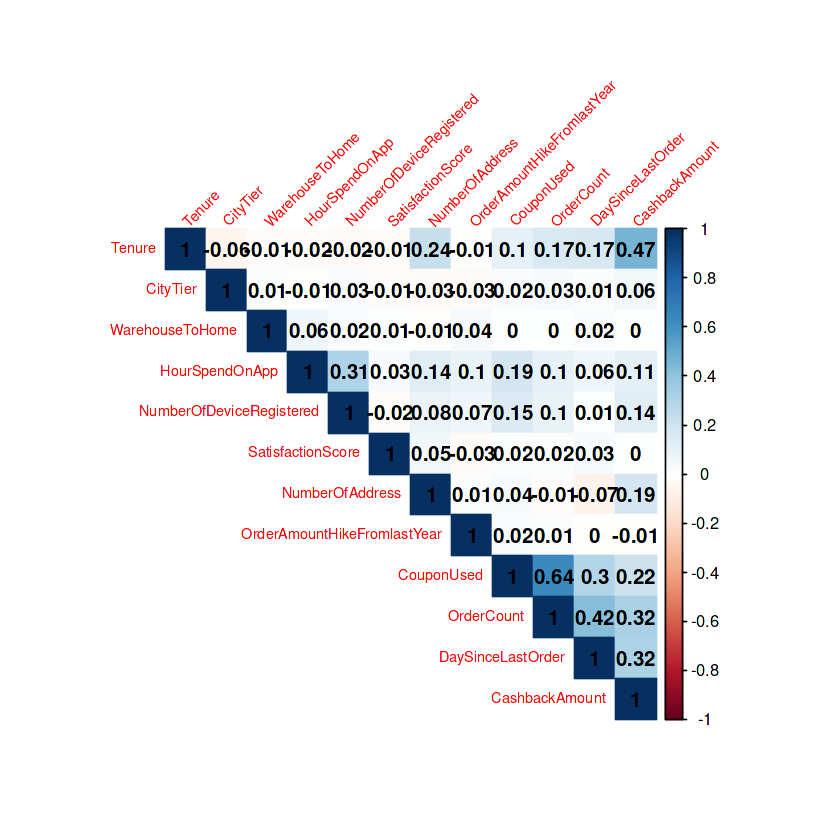

In [28]:
library(corrplot)

# Select only numeric columns for the correlation matrix
numeric_data <- data[sapply(data, is.numeric)]

# Calculate the correlation matrix
correlation_matrix <- cor(numeric_data)

# Plot the heatmap
heatmap_plot <- corrplot(correlation_matrix, method = "color", type = "upper", tl.cex = 0.7, tl.srt = 45, addCoef.col = "black")

# Display the heatmap
print(heatmap_plot)